In [1]:
from google.colab import files
upload=files.upload()

Saving drug200.csv to drug200.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
dataset1 = pd.read_csv('drug200.csv')
dataset1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df = pd.DataFrame(dataset1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
df.drop(['Age'], axis=1, inplace=True)
df

,BP,Cholesterol,Na_to_K,Drug
0,HIGH,HIGH,25.355,DrugY
1,LOW,HIGH,13.093,drugC
2,LOW,HIGH,10.114,drugC
3,NORMAL,HIGH,7.798,drugX
4,LOW,HIGH,18.043,DrugY
...,...,...,...,...
195,LOW,HIGH,11.567,drugC
196,LOW,HIGH,12.006,drugC
197,NORMAL,HIGH,9.894,drugX
198,NORMAL,NORMAL,14.020,drugX


In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['BP']= label_encoder.fit_transform(df['BP'])

df['BP'].unique()

array([0, 1, 2])

In [8]:
df['Cholesterol']= label_encoder.fit_transform(df['Cholesterol'])

df['Cholesterol'].unique()

array([0, 1])

In [9]:
df['Drug']= label_encoder.fit_transform(df['Drug'])

df['Drug'].unique()

array([0, 3, 4, 1, 2])

In [10]:
dataset1 = pd.get_dummies(df)
dataset1

,BP,Cholesterol,Na_to_K,Drug
0,0,0,25.355,0
1,1,0,13.093,3
2,1,0,10.114,3
3,2,0,7.798,4
4,1,0,18.043,0
...,...,...,...,...
195,1,0,11.567,3
196,1,0,12.006,3
197,2,0,9.894,4
198,2,1,14.020,4


In [11]:
def min_max_normallize(dataset1):
    min_val = np.min(dataset1, axis=0)
    max_val = np.max(dataset1, axis=0)
    normal = (dataset1 - min_val) / (max_val - min_val)
    return normal

In [12]:
dataset1 = min_max_normallize(dataset1)
dataset1

,BP,Cholesterol,Na_to_K,Drug
0,0.0,0.0,0.596848,0.00
1,0.5,0.0,0.213397,0.75
2,0.5,0.0,0.120239,0.75
3,1.0,0.0,0.047814,1.00
4,0.5,0.0,0.368191,0.00
...,...,...,...,...
195,0.5,0.0,0.165676,0.75
196,0.5,0.0,0.179405,0.75
197,1.0,0.0,0.113359,1.00
198,1.0,1.0,0.242385,1.00


array([[<Axes: xlabel='BP', ylabel='BP'>,
        <Axes: xlabel='Cholesterol', ylabel='BP'>,
        <Axes: xlabel='Na_to_K', ylabel='BP'>,
        <Axes: xlabel='Drug', ylabel='BP'>],
       [<Axes: xlabel='BP', ylabel='Cholesterol'>,
        <Axes: xlabel='Cholesterol', ylabel='Cholesterol'>,
        <Axes: xlabel='Na_to_K', ylabel='Cholesterol'>,
        <Axes: xlabel='Drug', ylabel='Cholesterol'>],
       [<Axes: xlabel='BP', ylabel='Na_to_K'>,
        <Axes: xlabel='Cholesterol', ylabel='Na_to_K'>,
        <Axes: xlabel='Na_to_K', ylabel='Na_to_K'>,
        <Axes: xlabel='Drug', ylabel='Na_to_K'>],
       [<Axes: xlabel='BP', ylabel='Drug'>,
        <Axes: xlabel='Cholesterol', ylabel='Drug'>,
        <Axes: xlabel='Na_to_K', ylabel='Drug'>,
        <Axes: xlabel='Drug', ylabel='Drug'>]], dtype=object)

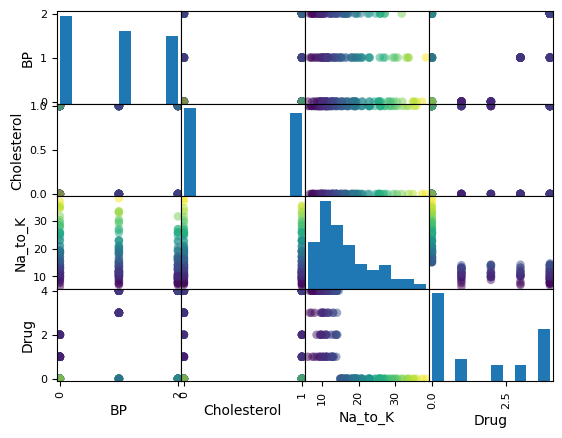

In [13]:
pd.plotting.scatter_matrix(df, c=df.Na_to_K, s=150)

In [60]:
x = df.iloc[:, :5]
y = df.iloc[:, 0]

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)
x_test

,BP,Cholesterol,Na_to_K,Drug
62,1,1,20.693,0
24,1,0,33.486,0
118,0,1,10.292,1
136,0,0,10.977,2
170,2,0,12.879,4
48,2,0,31.686,0
98,0,1,35.639,0
172,2,1,17.225,0
20,1,1,19.128,0
196,1,0,12.006,3


In [76]:
my_mlp = MLPClassifier(hidden_layer_sizes=10, max_iter=2, alpha=1e-4)


In [77]:
my_mlp.fit(x_train, y_train)
my_mlp

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=10, max_iter=2)

In [78]:
y_pred = my_mlp.predict(x_test)

In [79]:
y_pred == y_test

62      True
24      True
118    False
136    False
170    False
48     False
98     False
172    False
20      True
196     True
32      True
154     True
78     False
132     True
100    False
33     False
178    False
130    False
50     False
174    False
129    False
113     True
65     False
187    False
126    False
175    False
46     False
176    False
115    False
12      True
35     False
168     True
37      True
193     True
3      False
93      True
85     False
9       True
55      True
49      True
91     False
195     True
29      True
59     False
5      False
89     False
131     True
1       True
52      True
95      True
147    False
143    False
124    False
148     True
111    False
145    False
104    False
97     False
108    False
41     False
Name: BP, dtype: bool

In [80]:
confusion_matrix(y_test, y_pred)

array([[ 0, 24,  0],
       [ 0, 23,  0],
       [ 0, 13,  0]])

In [81]:
my_mlp.score(x_train, y_train)

0.29285714285714287

In [82]:
my_mlp.score(x_test, y_test)

0.38333333333333336

In [83]:
score = cross_val_score(my_mlp, x, y)
score.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

0.36

In [46]:
import matplotlib.pylab as plt

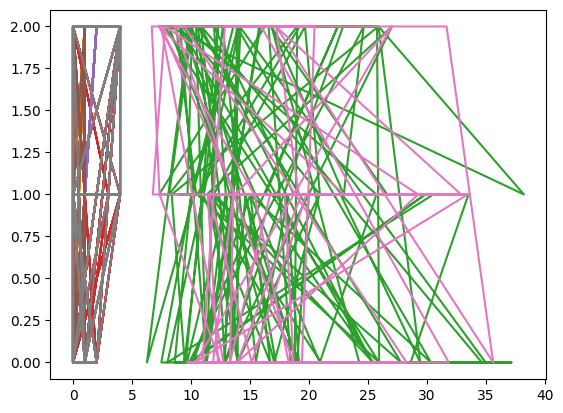

In [84]:
plt.plot(x_train, y_train, label='Train Accuracy')
plt.plot(x_test, y_test, label='Test Accuracy')

plt.show()